# EXTRACT FEATURE

In [1]:
import pandas as pd
import numpy as np
# numpy.set_printoptions(threshold=numpy.nan)
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import librosa
import librosa.display
import IPython.display as ipd

from os import path
from pydub import AudioSegment
from pathlib import Path

In [2]:
# #PATH

path_info = "C:/Users/USER/Downloads/Tugas Akhir/dataset/annotations/"
path_to_fitur = "C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/"
path_to_file = "C:/Users/USER/Downloads/Tugas Akhir/dataset/clips_45sec_wav/"
# path_to_file_45 = "C:/Users/USER/Downloads/Tugas Akhir/dataset/clips_45sec_wav/"

In [3]:
# Song Info

filename = "songs_info.csv"
info = pd.read_csv(path_info + filename)
info.head()

,song_id,file_name,Artist,Song title,start of the segment (min.sec),end of the segment (min.sec),Genre,Mediaeval 2013 set
0,2,\t2.mp3,The New Mystikal Troubadours\t,\tTonight A Lonely Century\t,0.48,1.33,\tBlues\t,development
1,3,\t3.mp3,Kevin MacLeod\t,\tDD Groove\t,0.36,1.21,\tBlues\t,evaluation
2,4,\t4.mp3,Kevin MacLeod\t,\tSlow Burn\t,1.29,2.14,\tBlues\t,development
3,5,\t5.mp3,My Bubba & Mi\t,\tNothing Much\t,0.36,1.21,\tBlues\t,development
4,7,\t7.mp3,Kevin MacLeod\t,\tHustle\t,0.20,1.05,\tBlues\t,development


In [4]:
print(info['Mediaeval 2013 set'].value_counts(dropna=False))

development    619
evaluation     125
Name: Mediaeval 2013 set, dtype: int64


In [6]:
song_file = info['song_id'].to_list()

In [31]:
# #Convert to WAV

# song_file = info['song_id'].to_list()


# for key in song_file:

#     # # files                                                                         
#     src = "C:/Users/USER/Downloads/Tugas Akhir/dataset/clips_45sec/"+str(key)+".mp3"
#     dst = "C:/Users/USER/Downloads/Tugas Akhir/dataset/clips_45sec_wav/"+str(key)+".wav"

#     # # convert wav to mp3                                                            
#     sound = AudioSegment.from_mp3(src)
#     sound.export(dst, format="wav")

In [7]:
# #MFCC
def mfcc(y,sr,file):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13) #13 is default dimension frame 512
    mfcc_np = np.asarray(mfcc)
    mfcc_to_csv = pd.DataFrame(mfcc)
    mfcc_to_csv.to_csv(path_to_fitur+file+"/mfcc.csv")
    return mfcc

# #CHROMA
def chroma(y,sr,file):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=24)
    chroma_to_csv = pd.DataFrame(chroma)
    chroma_to_csv.to_csv(path_to_fitur+file+"/chroma.csv")
    return chroma

# #TIMBRE // ZERO CROSSING 
def zc(y,sr,file):
    zc = librosa.feature.zero_crossing_rate(y) #1 is default dimension 512 frame
    zc_to_csv = pd.DataFrame(zc)
    zc_to_csv.to_csv(path_to_fitur+file+"/zc.csv")
    return zc


# #TIMBRE // FLUX 
def flux(y,sr,file):
    onset_env = librosa.onset.onset_strength(y=y, sr=sr) #1 is default dimension 512 frame
    flux_to_csv = pd.DataFrame(onset_env)
    flux_to_csv.to_csv(path_to_fitur+file+"/flux.csv")
    return onset_env

# #TIMBRE // CENTROID 
def cent(y,sr,file):
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    cent_to_csv = pd.DataFrame(cent)
    cent_to_csv.to_csv(path_to_fitur+file+"/cent.csv")
    return cent

# #TIMBRE // ROLLOFF
def rollof(y,sr,file):
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr) #1 is default dimension 512 frame
    rolloff_to_csv = pd.DataFrame(rolloff)
    rolloff_to_csv.to_csv(path_to_fitur+file+"/rolloff.csv")
    return rolloff

# #SCF and SFM 

In [11]:
def fitur(file):
    #load file
    check = Path(path_to_file+file+".wav")
    if check.is_file():
        # file exists
        paths = path_to_file+file+".wav"
    
        y, sr = librosa.load(paths,duration=45.0,sr=22050,mono=False) #load 45 and with same freq
        content = rollof(y,sr,file)
        content = cent(y,sr,file) # CENTROID
#         content = flux(y,sr,file) #FLUX
#         content = zc(y,sr,file) #ZC
#         content = chroma(y,sr,file) #chroma
#         content = mfcc(y,sr,file) #mfcc

        return content

In [9]:
def matrix_form(fiture):
    print("Bentuk matrix :",fiture.shape) # 45 * SR // frame
    print("Nilai Max matrix :",fiture.max())
    print("Nilai Min matrix :",fiture.min())
    print("\n")

In [12]:
for val in song_file:
    # make die
    try:  
        os.mkdir(path_to_fitur+str(val))
    except OSError:  
        print ("Creation of the directory %s failed" % path_to_fitur)
    else:  
        print ("Successfully created the directory %s " % path_to_fitur)
        
    fiture = fitur(str(val))
    matrix_form(fiture)

Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3946.8779586637343
Nilai Min matrix : 930.6076819144585


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2981.052552982268
Nilai Min matrix : 258.0286978098507


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4339.692595452596
Nilai Min matrix : 486.93423948514123


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5398.36794078158
Nilai Min matrix : 481.4515444292399


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2824.616020850343
Nilai Min matrix : 241.96159458469631


Creation of the directory C:/Users/USER/Dow

Bentuk matrix : (1, 1938)
Nilai Max matrix : 3460.763993216464
Nilai Min matrix : 1129.8985688841292


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4665.173085216797
Nilai Min matrix : 503.5562516735509


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4638.993842452037
Nilai Min matrix : 1051.8583671014658


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3539.0401295399342
Nilai Min matrix : 762.1579511507542


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2168.0428510817455
Nilai Min matrix : 563.1313635026078


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matri

Bentuk matrix : (1, 1938)
Nilai Max matrix : 3333.3760267452044
Nilai Min matrix : 813.3030127126318


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3159.1161334861363
Nilai Min matrix : 569.9085074357813


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4867.897436352173
Nilai Min matrix : 655.2686567876154


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5189.250663206451
Nilai Min matrix : 485.5485517054177


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 6352.191813963402
Nilai Min matrix : 0.0


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4202.0662532

Bentuk matrix : (1, 1938)
Nilai Max matrix : 2910.06222804598
Nilai Min matrix : 415.3198721445755


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 1706.9295421843958
Nilai Min matrix : 482.51374913210674


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 1632.1503490768455
Nilai Min matrix : 269.1549603417687


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 1724.6484871204552
Nilai Min matrix : 388.07011031707395


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4091.255703664606
Nilai Min matrix : 0.0


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 1778.11536

Bentuk matrix : (1, 1938)
Nilai Max matrix : 5699.226490424326
Nilai Min matrix : 170.0995429572078


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 1228.7380864046984
Nilai Min matrix : 338.5098396393731


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2843.90595860155
Nilai Min matrix : 498.20536507796277


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2452.2409609619135
Nilai Min matrix : 312.1134971227016


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2877.0815146280506
Nilai Min matrix : 993.7813171728046


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix

Bentuk matrix : (1, 1938)
Nilai Max matrix : 3866.383461797114
Nilai Min matrix : 1448.7718946164982


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 6399.756279477409
Nilai Min matrix : 595.2595119740175


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4225.587082902266
Nilai Min matrix : 800.3328830614429


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2911.7362022264415
Nilai Min matrix : 608.258448929116


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 6498.704242061443
Nilai Min matrix : 499.04853826968804


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix 

Bentuk matrix : (1, 1938)
Nilai Max matrix : 5882.2655185831045
Nilai Min matrix : 268.3973863315791


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4774.322933294889
Nilai Min matrix : 712.3705933558092


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5370.807435494686
Nilai Min matrix : 318.7870410224846


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 6192.83051120114
Nilai Min matrix : 775.9704463046991


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2996.557793979429
Nilai Min matrix : 1077.1259490821974


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix :

Bentuk matrix : (1, 1938)
Nilai Max matrix : 6123.079845404592
Nilai Min matrix : 0.0


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4219.521608647302
Nilai Min matrix : 494.6248595201747


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3459.360127554664
Nilai Min matrix : 265.20286547978196


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2916.3283774968777
Nilai Min matrix : 452.09192328663073


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4423.189547538117
Nilai Min matrix : 386.7024703149443


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3175.168039

Bentuk matrix : (1, 1938)
Nilai Max matrix : 2409.1649242569797
Nilai Min matrix : 543.1638521404234


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 6423.968048980942
Nilai Min matrix : 475.76638581045245


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2956.6777242862695
Nilai Min matrix : 611.130328490186


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3744.267073547457
Nilai Min matrix : 301.9892594058608


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4897.126568585315
Nilai Min matrix : 1063.5701175633862


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix

Bentuk matrix : (1, 1938)
Nilai Max matrix : 5455.011957355204
Nilai Min matrix : 129.7803226644073


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2220.9669390049175
Nilai Min matrix : 510.7910858525756


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5446.28357728047
Nilai Min matrix : 319.0075399948996


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 899.9633985421253
Nilai Min matrix : 185.76062149058546


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 1898.8011196253012
Nilai Min matrix : 458.8661028380039


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix 

Bentuk matrix : (1, 1938)
Nilai Max matrix : 3103.911513963096
Nilai Min matrix : 1176.2567933946025


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3107.9241597594855
Nilai Min matrix : 2362.058811725038


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3369.665312256076
Nilai Min matrix : 591.4776559376825


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3982.981985769172
Nilai Min matrix : 604.7097505013473


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 7020.140749649152
Nilai Min matrix : 378.9909546503502


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix 

Bentuk matrix : (1, 1938)
Nilai Max matrix : 5692.711329466428
Nilai Min matrix : 1673.8244744391816


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4276.092019681715
Nilai Min matrix : 439.02587458584253


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4078.675835537875
Nilai Min matrix : 524.3062701648399


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3785.3349341396324
Nilai Min matrix : 388.80683638005763


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2834.8676061498627
Nilai Min matrix : 878.3413468954031


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matr

Bentuk matrix : (1, 1938)
Nilai Max matrix : 2167.99211424645
Nilai Min matrix : 363.4264367360317


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3306.872207287906
Nilai Min matrix : 404.3247194284688


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3628.449563271348
Nilai Min matrix : 871.4533867518304


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5339.934002013916
Nilai Min matrix : 1055.3061982083211


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4357.642556916467
Nilai Min matrix : 813.5159594419412


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 

Bentuk matrix : (1, 1938)
Nilai Max matrix : 3361.405542234548
Nilai Min matrix : 791.7633891761859


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 1192.8625816004894
Nilai Min matrix : 510.34367921882404


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2724.5651292178545
Nilai Min matrix : 716.2083781485849


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5884.482456743141
Nilai Min matrix : 515.0831989403122


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 7629.836585343861
Nilai Min matrix : 777.537121541359


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix 

Bentuk matrix : (1, 1938)
Nilai Max matrix : 6292.853278132485
Nilai Min matrix : 569.2564428791114


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5200.597055368016
Nilai Min matrix : 0.0


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 1206.4350787468677
Nilai Min matrix : 500.07323165153906


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 1582.3154909221878
Nilai Min matrix : 0.0


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2263.3865359971915
Nilai Min matrix : 356.9982706228171


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 6949.678728898492
Nilai 

Bentuk matrix : (1, 1938)
Nilai Max matrix : 5723.325963682992
Nilai Min matrix : 410.6631159087051


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2542.9129103769646
Nilai Min matrix : 0.0


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4959.528434877749
Nilai Min matrix : 1119.0404860575077


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 6904.058769620552
Nilai Min matrix : 532.77623805138


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5477.595431757162
Nilai Min matrix : 102.92459929453534


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5242.57772588

Bentuk matrix : (1, 1938)
Nilai Max matrix : 1528.8131848195276
Nilai Min matrix : 597.173035257639


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 1400.2731390823617
Nilai Min matrix : 157.11584545596324


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4738.762124496358
Nilai Min matrix : 1493.1019235405156


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4050.1934096930577
Nilai Min matrix : 1588.0846268315427


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5477.47182017908
Nilai Min matrix : 0.0


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 5224.28954

Bentuk matrix : (1, 1938)
Nilai Max matrix : 5686.4085794144685
Nilai Min matrix : 207.21342944169092


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 2389.8717899341323
Nilai Min matrix : 0.0


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4870.6677292948525
Nilai Min matrix : 695.5275442919814


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4059.7302294941796
Nilai Min matrix : 1074.3031080044093


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 4994.418413169892
Nilai Min matrix : 486.99135161697325


Creation of the directory C:/Users/USER/Downloads/Tugas Akhir/dataset/coba fitur/ failed
Bentuk matrix : (1, 1938)
Nilai Max matrix : 3873.80

In [10]:
# # LOAD

# # 1. Get the file path to the included audio example
# # filename = librosa.util.example_audio_file()
# path = "C:/Users/USER/Downloads/Tugas Akhir/dataset/clips_45sec/2.mp3"

# # 2. Load the audio as a waveform `y`
# #    Store the sampling rate as `sr`
# y, sr = librosa.load(path,sr=22050,mono=False) #load 45 and with same freq
# sr

In [126]:
# ipd.Audio(data=y, rate=sr) # load a NumPy array

# LIBROSA

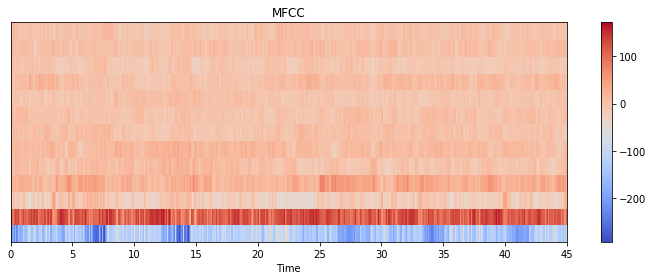

In [11]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

Bentuk matrix : (24, 1938)
Nilai Max matrix : 1.0
Nilai Min matrix : 0.0015890707787977367


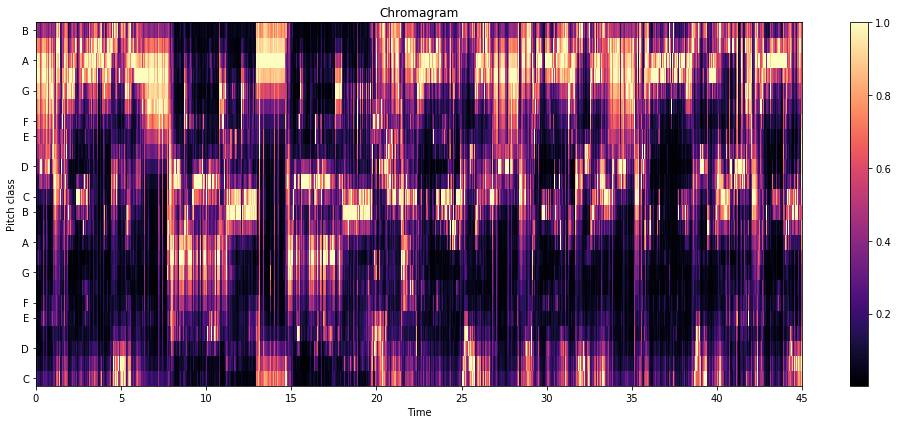

In [13]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

Bentuk matrix : (1, 1938)
Nilai Max matrix : 3985.364104397425
Nilai Min matrix : 941.1903311788266


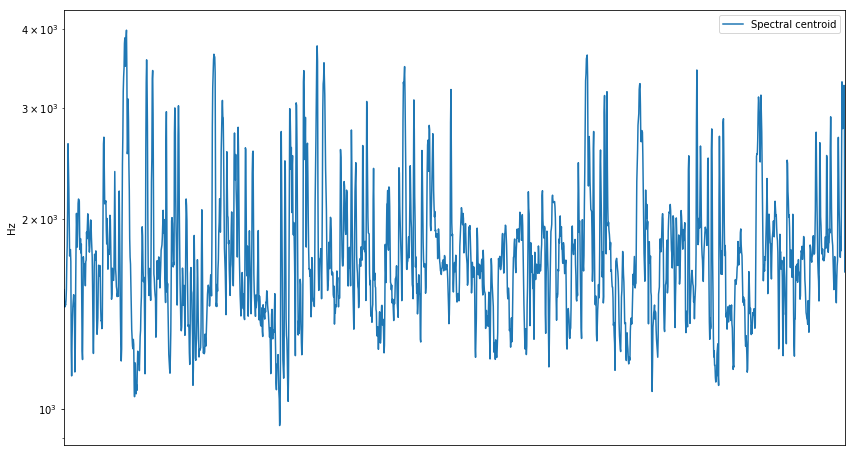

In [15]:
plt.figure(figsize=(14, 8))
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

array([0.00000000e+00, 2.32199546e-02, 4.64399093e-02, ...,
       4.49770522e+01, 4.50002721e+01, 4.50234921e+01])

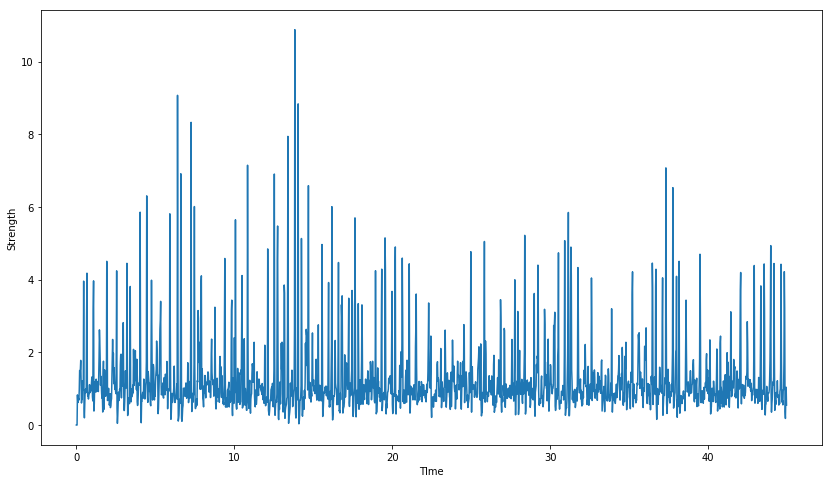

In [17]:
plt.figure(figsize=(14, 8))

plt.ylabel('Strength')
plt.xlabel('TIme')
plt.plot(times, onset_env, label='Mean (mel)')

Bentuk matrix : (1, 1938)
Nilai Max matrix : 8064.1845703125
Nilai Min matrix : 1679.58984375


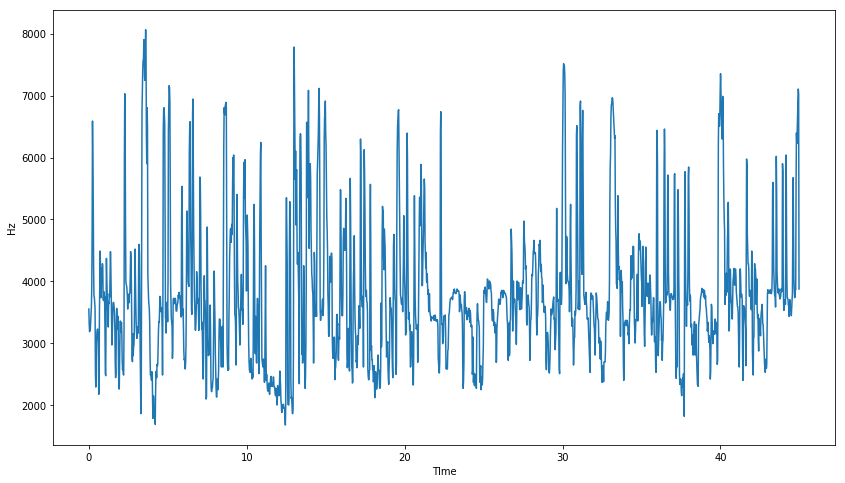

In [19]:
plt.figure(figsize=(14, 8))

plt.ylabel('Hz')
plt.xlabel('TIme')
plt.plot(times, rolloff.T,label='Roll-off frequency')

Bentuk matrix : (1, 1938)
Nilai Max matrix : 0.18798828125
Nilai Min matrix : 0.01220703125


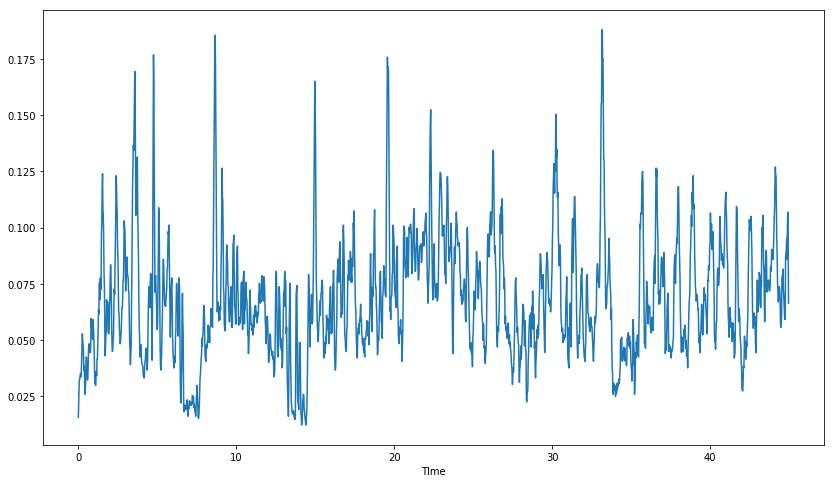

In [21]:
plt.figure(figsize=(14, 8))

# plt.ylabel('Hz')
plt.xlabel('TIme')
plt.plot(times, zc.T)

In [24]:
# SCF and SFM

# y, sr = librosa.load(librosa.util.example_audio_file())
flatness = librosa.feature.spectral_flatness(y=y)
print("Bentuk matrix :",flatness.shape)
print("Nilai Max matrix :",flatness.max())
print("Nilai Min matrix :",flatness.min())
# zc_to_csv = pandas.DataFrame(zc)
# zc_to_csv.to_csv("zc.csv")

Bentuk matrix : (1, 1938)
Nilai Max matrix : 0.07740911
Nilai Min matrix : 0.00032310042


# Manual

In [8]:
## MFCC

import numpy
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [6]:
sample_rate, signal = scipy.io.wavfile.read("C:/Users/USER/Downloads/Tugas Akhir/dataset/clips_45sec_wav/2.wav")  # File assumed to be in the same directory
signal = signal[0:int(45 * sample_rate)]  # Keep the first 45 seconds

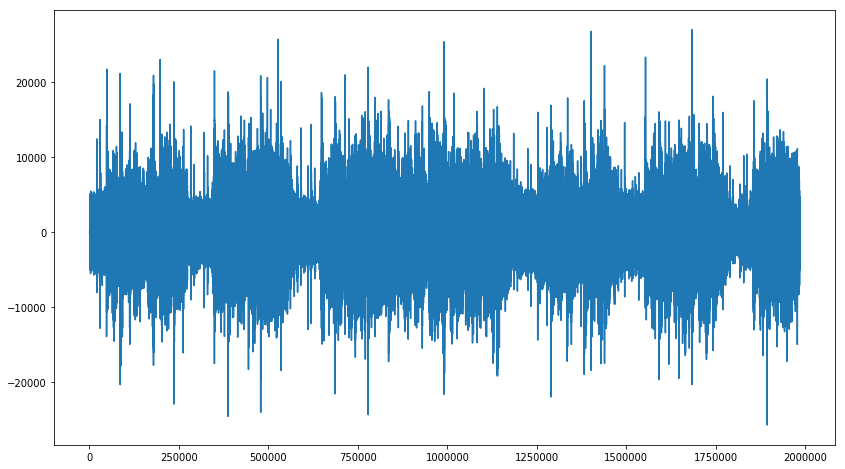

In [10]:
plt.figure(figsize=(14, 8))

# plt.ylabel('Hz')
# plt.xlabel('TIme')
plt.plot(signal)

In [11]:
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

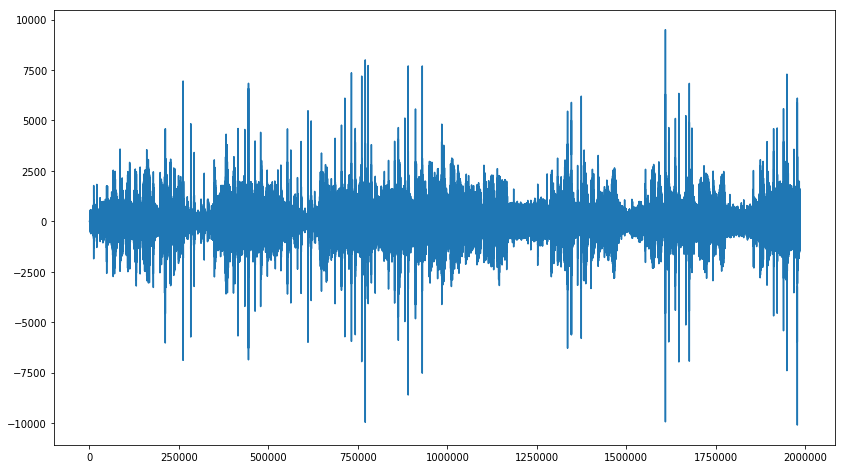

In [12]:
plt.figure(figsize=(14, 8))

# plt.ylabel('Hz')
# plt.xlabel('TIme')
plt.plot(emphasized_signal)

In [23]:
frame_size = 0.0232
frame_stride = 0.01
NFFT = 512
nfilt = 40

In [24]:
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

In [25]:
frames *= numpy.hamming(frame_length)

In [26]:
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

In [27]:
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

In [31]:
plt.figure(figsize=(14, 8))

# plt.ylabel('Hz')
# plt.xlabel('TIme')
specgram(filter_banks)

NameError: name 'ax1' is not defined